<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/newton_sistema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistemas de ecuaciones no lineales. Método de Newton Raphson

In [0]:
import numpy as np

In [0]:

def Newton_system(F, J, x, eps):
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano de F. Ambos F y J deben ser función de  x.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter


In [0]:
def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac
    

In [0]:
def Newton_system2(F, x, eps): 
    """
    Resolución del sistema no lineal F=0  con el método de  Newton.
    J es el jacobiano de F. x debe pasarse como un array de FLOATS.
    El vector  x  contiene los valores de inicio para las raíces.
    Las iteraciones continúan hasta que until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 20:
       
        J=jacobian(F,x)
        delta = np.linalg.solve(J, -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print('iteración',iteration_counter)
    # Hay una solución, o demasiadas iteraciones
    if abs(F_norm) > eps:
        iteration_counter = -1  #no hay solucion en las iteraciones indicadas
    return x, iteration_counter

\begin{align}
&x^2 = y - x\cos(\pi x)
\\ 
&yx + e^{-y} = x^{-1}
\end{align}

Haciendo $x_0=x $ y $x_1=y$. Tenemos

\begin{align*}
F_0(x_0,x_1) &= x_0^2 - x_1 + x_0\cos(\pi x_0) = 0,\\ 
F_1(x_0,x_1) &= x_1x_0 + e^{-x_1} - x_0^{-1} = 0\thinspace .
\end{align*}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1}
\end{array}\right) =
\left(\begin{array}{ll}
2x_0 + \cos(\pi x_0) - \pi x_0\sin(\pi x_0) &
-1 \\ 
x_1 + x_0^{-2} & x_0 - e^{-x_1}
\end{array}\right)
$

In [0]:
from sympy import *
x0, x1 = symbols('x0 x1')
F0 = x0**2 - x1 + x0*cos(pi*x0)
F1 = x0*x1 + exp(-x1) - x0**(-1)
print(diff(F0, x0))
print(diff(F0, x1))
print(diff(F1, x0))
print(diff(F1, x1))


-pi*x0*sin(pi*x0) + 2*x0 + cos(pi*x0)
-1
x1 + x0**(-2)
x0 - exp(-x1)


In [0]:
def F0(x):
    return np.array([x[0]**2 - x[1] + x[0]*np.cos(np.pi*x[0]),
                     x[0]*x[1] + np.exp(-x[1]) - x[0]**(-1.)])

def J0(x):
    return np.array([[2*x[0] + np.cos(np.pi*x[0]) - np.pi*x[0]*np.sin(np.pi*x[0]),
                      -1.],[x[1] + x[0]**(-2.), x[0] - np.exp(-x[1])]])

    

In [0]:

x, n = Newton_system(F0, J0, x=np.array([2, -1]), eps=0.0001)
print (n, x)


iteración 1
iteración 2
iteración 3
iteración 4
4 [ 1.00000006e+00 -1.00943962e-06]


In [0]:
J0([2,-1])

array([[ 5.        , -1.        ],
       [-0.75      , -0.71828183]])

In [0]:

jacobian(F0,[2.,-1.])


array([[ 4.99911299, -1.        ],
       [-0.7500125 , -0.71814592]])

In [0]:
x, n = Newton_system2(F0, x=np.array([2, -1], dtype=float), eps=0.0001)
print (n, x)


iteración 1
iteración 2
iteración 3
iteración 4
4 [ 9.99999980e-01 -1.31348473e-06]


\begin{align}
&3x_0-cos(x_1x_2)- \frac{3}{2}=0
\\ 
&4x_0^{2}-625x_1^{2}+2x_2-1=0 \\
&20x_2+e^{-x_0x_1}+9 = 0
\end{align}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1} & \frac{\partial F_0}{\partial x_2}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2}\\
\frac{\partial F_2}{\partial x_0} & \frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2}
\end{array}\right) =
\left(\begin{array}{ll}
3  & x_2\sin(x_1x_2)& x_1\sin(x_1x_2) \\
8x_0 & -1250x_1 & 2 \\ 
-x_1e^{-x_0x_1} & -x_0e^{-x_0x_1} & 20
\end{array}\right)
$

In [0]:
def F1(x):
    return np.array([3*x[0] - np.cos(x[1]* x[2])- 3/2,
                       4*x[0]**2-625*x[1]**2+2*x[2]-1.,
                     20*x[2]+np.exp(-x[0]*x[1])+9])

def J1(x):
    return np.array([[3 , x[2]*np.sin(x[1]*x[2]), x[1]*np.sin(x[1]*x[2])],
                     [8*x[0], -1250*x[1],2],
                    [-x[1]*np.exp(-x[0]*x[1]),-x[0]*np.exp(-x[0]*x[1]),20]])

    

In [0]:
x, n = Newton_system(F1, J1, x=np.array([1., 1.,1.]), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
8 [ 0.83328161  0.03533462 -0.49854928]


In [0]:
x, n = Newton_system2(F1, x=np.array([1, 1,1],dtype=float), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
8 [ 0.83328161  0.03533463 -0.49854928]


In [0]:
F1([0.83324489,  0.04624733, -0.49810988])

array([-7.28049532e-09,  9.24194372e-08,  8.91044891e-08])

\begin{align}
&x_0^{2}-2x_0+x_1^{2}-x_2+1=0
\\ 
&x_0x_1^{2}-x_0 -3x_1+x_1x_2+2 = 0\\
&x_0x_2^{2}-3x_2+x_1x_2^{2}+x_0x_1 = 0
\end{align}

$
\nabla F = \left(\begin{array}{ll}
\frac{\partial F_0}{\partial x_0} & \frac{\partial F_0}{\partial x_1} & \frac{\partial F_0}{\partial x_2}\\ 
\frac{\partial F_1}{\partial x_0} & \frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2}\\
\frac{\partial F_2}{\partial x_0} & \frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2}
\end{array}\right) =
\left(\begin{array}{ll}
2x_0-2 & 2x_1& -1 \\
x_1^{2}-1 &2x_0x_1-3+x_2 & x_1 \\ 
x_2^{2}+x_1 & x_2^{2}+x_0 & 2x_0x_2-3+2x_1x_2
\end{array}\right)
$

In [0]:
def F2(x):
    return np.array([x[0]**2 - 2*x[0]+x[1]**2- x[2]+1,
                       x[0]*x[1]**2-x[0]-3*x[1]+x[1]*x[2]+2,
                     x[0]*x[2]**2 -3*x[2]+x[1]*x[2]**2 +x[0]*x[1]])

def J2(x):
    return np.array([[2*x[0]-2 , 2*x[1],-1],
                     [x[1]**2 -1,2*x[0]*x[1]-3+x[2],x[1]],
                    [x[2]**2+x[1], x[2]**2+x[0],2*x[0]*x[2]- 3 + 2*x[1]*x[2]]])

    

In [0]:
x, n = Newton_system(F2, J2, x=np.array([1., 2.,3.]), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
8 [1.0000015  1.00000149 1.00000005]


In [0]:
F2([1,1,1])

array([0, 0, 0])

In [0]:
a,b = jacobian(F1,[1,1,1])

In [0]:
a

array([[ 3.00000000e+00,  8.41497999e-01,  8.41497999e-01],
       [ 4.00000000e+00, -1.25006250e+03,  2.00000000e+00],
       [-3.67861048e-01, -3.67861048e-01,  2.00000000e+01]])

In [0]:
b

array([   0.95969769, -620.        ,   29.36787944])

In [0]:
J1([1,1,1])

array([[ 3.00000000e+00,  8.41470985e-01,  8.41470985e-01],
       [ 8.00000000e+00, -1.25000000e+03,  2.00000000e+00],
       [-3.67879441e-01, -3.67879441e-01,  2.00000000e+01]])

In [0]:
F1([1,1,1])

array([   0.95969769, -620.        ,   29.36787944])

In [0]:
x, n = Newton_system2(F2, x=np.array([1., 2.,3.]), eps=0.00001)
print (n, x)

iteración 1
iteración 2
iteración 3
iteración 4
iteración 5
iteración 6
iteración 7
iteración 8
8 [1.00000115 1.00000163 1.00000005]


In [0]:
from sympy import *
init_printing()
x0, x1 = symbols('x0 x1')
F0 = F2(x)
F0 = x0**2 - x1 + x0*cos(pi*x0)
F1 = x0*x1 + exp(-x1) - x0**(-1)
print(latex(diff(F0, x0)))
print(diff(F0, x1))
print(diff(F1, x0))
print(diff(F1, x1))
diff(F1, x1)

- \pi x_{0} \sin{\left (\pi x_{0} \right )} + 2 x_{0} + \cos{\left (\pi x_{0} \right )}
-1
x1 + x0**(-2)
x0 - exp(-x1)


In [0]:
X = Matrix([F0, F1])
Y = Matrix([x0, x1])
A =np.array(X.jacobian(Y))
print(A)

[[-pi*x0*sin(pi*x0) + 2*x0 + cos(pi*x0) -1]
 [x1 + x0**(-2) x0 - exp(-x1)]]


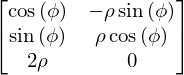

In [0]:
from sympy.abc import rho, phi
X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
Y = Matrix([rho, phi])
X.jacobian(Y)

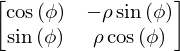

In [0]:
X = Matrix([rho*cos(phi), rho*sin(phi)])
X.jacobian(Y)

In [0]:
def jacobian(args, f, verbose=True, modules=["mpmath", "sympy"]):
    """
    Solves a nonlinear equation system numerically.

    f is a vector function of symbolic expressions representing the system.
    args are the variables.
    x0 is a starting vector close to a solution.

    Be careful with x0, not using floats might give unexpected results.

    Use modules to specify which modules should be used to evaluate the
    function and the Jacobian matrix. Make sure to use a module that supports
    matrices. For more information on the syntax, please see the docstring
    of lambdify.

    Currently only fully determined systems are supported.

    >>> from sympy import Symbol, Matrix
    >>> x1 = Symbol('x1')
    >>> x2 = Symbol('x2')
    >>> f1 = 3 * x1**2 - 2 * x2**2 - 1
    >>> f2 = x1**2 - 2 * x1 + x2**2 + 2 * x2 - 8
    >>> msolve((x1, x2), (f1, f2), (-1., 1.))
    [-1.19287309935246]
    [ 1.27844411169911]
    """
    if isinstance(f, (list, tuple)):
        f = Matrix(f).T
    if len(args) != f.cols:
        raise NotImplementedError("need exactly as many variables as equations")
    if verbose:
        print ("f(x):")
        print (f)
    # derive Jacobian
    J = f.jacobian(args)
    if verbose:
        print ("J(x):")
        print (J)
    # create functions
    f = lambdify(args, f.T, modules)
    J = lambdify(args, J, modules)
    return 

In [0]:
from sympy import Symbol, Matrix
x1 = Symbol('x1')
x2 = Symbol('x2')
f1 = 3 * x1**2 - 2 * x2**2 - 1
f2 = x1**2 - 2 * x1 + x2**2 + 2 * x2 - 8
jacobian((x1, x2), (f1, f2))
       